In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
def generate_report(directory):

    #print("Generating report for: ", directory)
    os.system("AMDuProfCLI report -i " + directory + " > /dev/null")


In [44]:
def plot_with_confidence_interval(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    # sorting delle ascisse e delle ordinate
    

    
    # Genera il grafico con l'intervallo di confidenza
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

    
def plot_with_confidence_interval_log(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()
    

# Funzione per leggere i dati e calcolare le statistiche
def read_data_and_calculate_statistics(directory):
    elapsed_times = []


    for dir in os.listdir(directory):
        #print("dirint: ", dir)
        #print(os.listdir(directory + "/" + dir))
        if 'report.csv' not in os.listdir(directory + "/" + dir):
            generate_report(os.path.join(directory, dir))

        
        try:#print(os.path.join(directory, dir, 'report.csv'))
            with open(os.path.join(directory, dir, 'report.csv')) as f:
                df = f.readlines()
                #print(df[43])

                elapsed_time = float(df[43].split(',')[1].replace('"', '').split(' ')[0])*1000
                elapsed_times.append(elapsed_time)
        except:
            print("Error in reading file: ", os.path.join(directory, dir, 'report.csv'))
            continue


            
            

    mean_elapsed_times = np.mean(elapsed_times)

    #calcolo intervallo di confidenza
    ci = 1.96 * np.std(elapsed_times) / np.sqrt(len(elapsed_times))

   

    return mean_elapsed_times, ci
            
            

    

        
            

In [45]:
def get_mean_waiting_time(directory):
    waiting_times = []


    for dir in os.listdir(directory):
        #print("dirint: ", dir)
        #print(os.listdir(directory + "/" + dir))
        if 'report.csv' not in os.listdir(directory + "/" + dir):
            generate_report(os.path.join(directory, dir))

        
        try:#print(os.path.join(directory, dir, 'report.csv'))
            with open(os.path.join(directory, dir, 'report.csv')) as f:
                df = f.readlines()

                elapsed_time = float(df[45].split(',')[1].replace('"', '').split(' ')[0])
                #print(df[45])
                waiting_times.append(elapsed_time)
                #print("Waiting time: ", elapsed_time)
        except:
            print("Error in reading file: ", os.path.join(directory, dir, 'report.csv'))
            continue


            
            

    mean_elapsed_times = np.mean(waiting_times)

    #calcolo intervallo di confidenza
    ci = 1.96 * np.std(waiting_times) / np.sqrt(len(waiting_times))

   

    return waiting_times, ci

Error in reading file:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/par/thread-1/10/AMDuProf-par-Threading_Apr-19-2024_18-11-17/report.csv
Error in reading file:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/par/thread-1/10/AMDuProf-par-Threading_Apr-19-2024_18-11-17/report.csv
Thread:  thread-1  Mean waiting time:  0.0
Thread:  thread-2  Mean waiting time:  0.35093296666666673
Thread:  thread-4  Mean waiting time:  0.5223238666666667
Error in reading file:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/par/thread-8/10/AMDuProf-par-Threading_Apr-19-2024_18-29-31/report.csv
Error in reading file:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/par/thread-8/10/AMDuProf-par-Threading_Apr-19-2024_18-29-31/report.csv
Thread:  thread-8  Mean waiting time:  0.6219566333333334
Error in reading file:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/par/thread-16/10/A

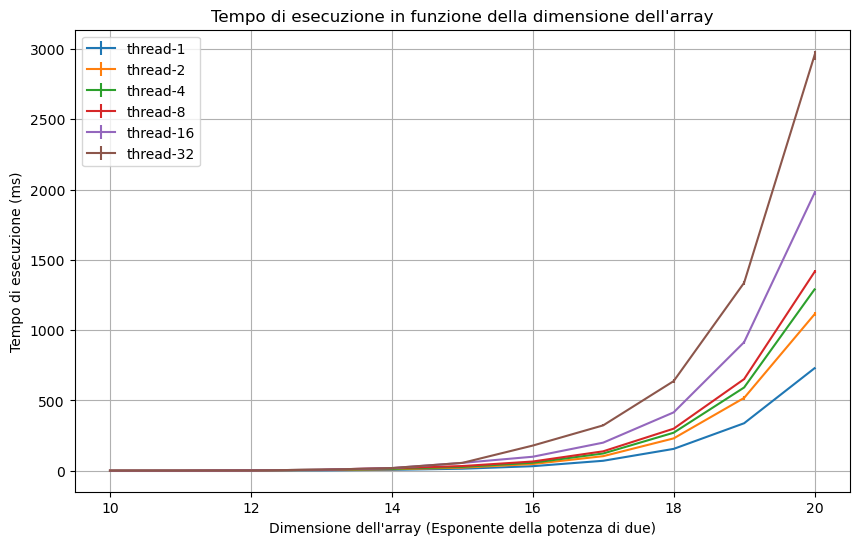

In [47]:

# Utilizzo della funzione per calcolare statistiche e generare il grafico
# Imposta i valori necessari per il percorso, le ripetizioni e il numero di configurazioni
path = os.getcwd()

#print(path)
path = os.path.join(path, "results", "par")
#print(path)

# Leggi i dati e calcola le statistiche
mean_elapsed_times = []
cis = []
sizes = []

list_of_dirs = os.listdir(path)
#ordino le directory per nome
list_of_dirs.sort()


ls = []
for dirs in list_of_dirs:
    ls.append(int(dirs.replace("thread-","")))

ls.sort()
#print(ls)

plt.figure(figsize=(10, 6))



for dirs in ls:
    dirs = "thread-"+str(dirs)
    list_of_dirs = os.listdir(os.path.join(path, dirs))
    #ordino le directory per nome
    list_of_dirs.sort()

    #print(dirs)
    
    
    for dir in list_of_dirs:

        #print(os.path.join(path, dirs, dir))
        #print(os.path.join(path, dirs, dir, dir2))
        try:
            size = int(dir)
            mean_elapsed_time, ci, = read_data_and_calculate_statistics(os.path.join(path, dirs, dir))
            sizes.append(size)
            mean_elapsed_times.append(mean_elapsed_time)
            cis.append(ci)
            waiting_times, ci = get_mean_waiting_time(os.path.join(path, dirs, dir))

            

            
        except ValueError:
            continue
    #compute the mean waiting time
    #print(waiting_times)
    print("Thread: ", dirs, " Mean waiting time: ", np.mean(waiting_times))
    #append to the plot
    plt.errorbar(sizes, mean_elapsed_times, yerr=cis, label=dirs)
    sizes = []
    mean_elapsed_times = []
    cis = []
    waiting_times = []

plt.xlabel('Dimensione dell\'array (Esponente della potenza di due)')
plt.ylabel('Tempo di esecuzione (ms)')
plt.title('Tempo di esecuzione in funzione della dimensione dell\'array')
plt.legend()
plt.grid()
save_path =  "plot.png"
plt.savefig(save_path)
plt.show()


#plot the speedup graph
#x will be the number of threads
#y will be the speedup
#speedup = T1/Tn












